# Notebook to analyse the precursors SMILES
Compare to QM9 dataset 

Visualise with tSNE

In [361]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
import os
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)
import matplotlib.image as mpimg

import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tqdm
from sklearn.metrics import accuracy_score, silhouette_score, silhouette_samples

In [199]:
#import files
# path = '/Users/pnt17/Library/CloudStorage/OneDrive-ImperialCollegeLondon/MRes_project_data/ceder_extract_data'
path = r'C:\Users\Piotr\OneDrive - Imperial College London\MRes_project_data\ceder_extract_data'
file_name = 'precursor_smiles_cleaned.csv'
pre_df = pd.read_csv(os.path.join(path,file_name))
pre_df.head(10)

,precursor,SMILES
0,citric acid,OC(=O)CC(O)(CC(O)=O)C(O)=O
1,calcein,OC(=O)CN(CC(O)=O)Cc1cc2c(Oc3cc(O)c(CN(CC(O)=O)...
2,N-(2-aminoethyl)-3-aminopropyldimethoxysilane,CO[SiH](CCCNCCN)OC
3,thiourea,NC(N)=S
4,p-phenylenediamine,Nc1ccc(N)cc1
5,ascorbic acid,OCC(O)C1OC(=C(O)C1=O)O
6,penicillamine,CC(C)(S)[C@H](N)C(O)=O
7,aminobenzoic acid,Nc1ccccc1C(O)=O
8,o-phenylenediamine,Nc1ccccc1N
9,dodecylamine,CCCCCCCCCCCCN


In [200]:
pre_df.shape

(383, 2)

In [201]:
#converting smiles to rdkit molecules
pre_mols = []
for entry in pre_df['SMILES'].to_list():
    pre_mols.append(Chem.MolFromSmiles(str(entry)))

[11:12:41] WARNING: not removing hydrogen atom without neighbors
[11:12:41] WARNING: not removing hydrogen atom without neighbors
[11:12:41] WARNING: not removing hydrogen atom without neighbors


In [202]:
#generating morgan fingerprints
pre_fps = [AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in pre_mols]

In [203]:
#Converting the fingerprints to numpy arrays
np_pre_fps =[]
for fp in pre_fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp,arr)
    np_pre_fps.append(arr)
len(np_pre_fps[0])

2048

In [457]:
pre_fps[1] == pre_fps[0]

False

In [205]:
pre_fps_df = pd.DataFrame(columns = [i for i in range(2048)])
for fp in np_pre_fps:
    pre_fps_df.loc[len(pre_fps_df)] = fp
pre_fps_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [417]:
#joining morgan fingerprint df to precursor df
morgan_pre_df = pre_df.join(pre_fps_df)

In [418]:
morgan_pre_df

,precursor,SMILES,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,citric acid,OC(=O)CC(O)(CC(O)=O)C(O)=O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,calcein,OC(=O)CN(CC(O)=O)Cc1cc2c(Oc3cc(O)c(CN(CC(O)=O)...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,N-(2-aminoethyl)-3-aminopropyldimethoxysilane,CO[SiH](CCCNCCN)OC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,thiourea,NC(N)=S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,p-phenylenediamine,Nc1ccc(N)cc1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,bilirubin,CC1=C(C=C)/C(NC1=O)=C/c2[nH]c(Cc3[nH]c(\C=C/4N...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
379,heparin sodium,CC(=O)NC1C(O)OC(CO[S](O)(=O)=O)C(OC2OC(C(OC3OC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,homophthalic acid,OC(=O)Cc1ccccc1C(O)=O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381,N-methyl-3-aminopropyltrimethoxysilane,CNCCC[Si](OC)(OC)OC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
morgan_pre = pre_fps_df.to_numpy()

In [208]:
tsne = TSNE().fit_transform(morgan_pre)

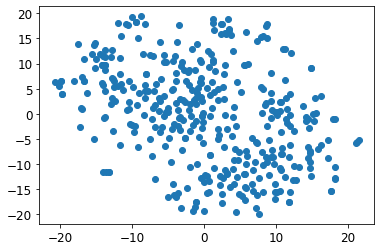

In [209]:
plt.figure()
plt.scatter(tsne[:,0], tsne[:,1])

In [210]:
#generating rdkit descriptors
def getMolDescriptors(mol, missingVal=None):
    ''' calculate the full list of descriptors for a molecule
    
        missingVal is used if the descriptor cannot be calculated
    '''
    res = {}
    for nm,fn in Descriptors._descList:
        # some of the descriptor fucntions can throw errors if they fail, catch those here:
        try:
            val = fn(mol)
        except:
            # print the error message:
            import traceback
            traceback.print_exc()
            # and set the descriptor value to whatever missingVal is
            val = missingVal
        res[nm] = val
    return res


In [211]:
rdkit_pre_df = pd.DataFrame(columns = ['precursor', 'SMILES'])
rdkit_pre_df['precursor'] = pre_df['precursor']
rdkit_pre_df['SMILES'] = pre_df['SMILES']
rdkit_pre_df.head(10)

,precursor,SMILES
0,citric acid,OC(=O)CC(O)(CC(O)=O)C(O)=O
1,calcein,OC(=O)CN(CC(O)=O)Cc1cc2c(Oc3cc(O)c(CN(CC(O)=O)...
2,N-(2-aminoethyl)-3-aminopropyldimethoxysilane,CO[SiH](CCCNCCN)OC
3,thiourea,NC(N)=S
4,p-phenylenediamine,Nc1ccc(N)cc1
5,ascorbic acid,OCC(O)C1OC(=C(O)C1=O)O
6,penicillamine,CC(C)(S)[C@H](N)C(O)=O
7,aminobenzoic acid,Nc1ccccc1C(O)=O
8,o-phenylenediamine,Nc1ccccc1N
9,dodecylamine,CCCCCCCCCCCCN


In [212]:
rdkit_fps = []
for mol in pre_mols:
    rdkit_fps.append(getMolDescriptors(mol))

[11:13:24] WARNING: not removing hydrogen atom without neighbors
[11:13:24] WARNING: not removing hydrogen atom without neighbors
[11:13:26] WARNING: not removing hydrogen atom without neighbors
[11:13:26] WARNING: not removing hydrogen atom without neighbors
[11:13:26] WARNING: not removing hydrogen atom without neighbors
[11:13:26] WARNING: not removing hydrogen atom without neighbors


In [213]:
rdkit_fps_df = pd.DataFrame.from_dict(rdkit_fps)
rdkit_fps_df.head(10)

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.315556,10.315556,1.144213e+00,-2.738426e+00,0.427421,192.123,184.059,192.027003,74,0,...,0,0,0,0,0,0,0,0,0,0
1,13.263626,13.263626,1.555847e-02,-1.753626e+00,0.157544,622.539,596.331,622.143489,234,0,...,0,0,0,0,0,0,0,0,0,0
2,5.319686,5.319686,7.037824e-01,-1.314917e+00,0.399678,192.335,172.175,192.129404,74,0,...,0,0,0,0,0,0,0,0,3,0
3,4.620370,4.620370,2.220446e-16,2.220446e-16,0.370874,76.124,72.092,76.009519,24,0,...,0,0,0,0,0,0,0,0,0,0
4,5.371111,5.371111,7.492593e-01,7.492593e-01,0.483927,108.144,100.080,108.068748,42,0,...,0,0,0,0,0,0,0,0,0,0
5,10.852083,10.852083,6.835648e-01,-1.440463e+00,0.411568,176.124,168.060,176.032088,68,0,...,0,0,0,0,0,0,0,0,0,0
6,10.172060,10.172060,6.469907e-01,-1.018519e+00,0.488091,149.215,138.127,149.051050,54,0,...,0,0,0,0,0,0,0,0,0,0
7,10.341759,10.341759,1.550926e-01,-9.878704e-01,0.566589,137.138,130.082,137.047678,52,0,...,0,0,0,0,0,0,0,0,0,0
8,5.394815,5.394815,6.458333e-01,6.458333e-01,0.483927,108.144,100.080,108.068748,42,0,...,0,0,0,0,0,0,0,0,0,0
9,5.424276,5.424276,8.715278e-01,8.715278e-01,0.513734,185.355,158.139,185.214350,80,0,...,0,0,0,0,0,0,0,0,8,0


In [300]:
rdkit_pre_df = rdkit_pre_df.join(rdkit_fps_df)

In [308]:
rdkit_pre_df = rdkit_pre_df.dropna()

In [354]:
rdkit_mols = []
for entry in rdkit_pre_df['SMILES'].to_list():
    rdkit_mols.append(Chem.MolFromSmiles(str(entry)))

[14:55:55] WARNING: not removing hydrogen atom without neighbors
[14:55:55] WARNING: not removing hydrogen atom without neighbors
[14:55:55] WARNING: not removing hydrogen atom without neighbors


In [455]:
#tanimoto similarity
#morgan fingerpring similarity

morgan_sim = np.zeros((len(pre_fps), len(pre_fps)))
for i in range(len(pre_fps)):
    similarity = DataStructs.BulkTanimotoSimilarity(pre_fps[i], pre_fps[:i])
    morgan_sim[i, :i] = similarity
    morgan_sim[:i, i] = similarity
    
morgan_sim

array([[0.        , 0.11320755, 0.02777778, ..., 0.19354839, 0.03030303,
        0.125     ],
       [0.11320755, 0.        , 0.01538462, ..., 0.22222222, 0.01612903,
        0.16071429],
       [0.02777778, 0.01538462, 0.        , ..., 0.02325581, 0.24242424,
        0.04878049],
       ...,
       [0.19354839, 0.22222222, 0.02325581, ..., 0.        , 0.025     ,
        0.26470588],
       [0.03030303, 0.01612903, 0.24242424, ..., 0.025     , 0.        ,
        0.02564103],
       [0.125     , 0.16071429, 0.04878049, ..., 0.26470588, 0.02564103,
        0.        ]])

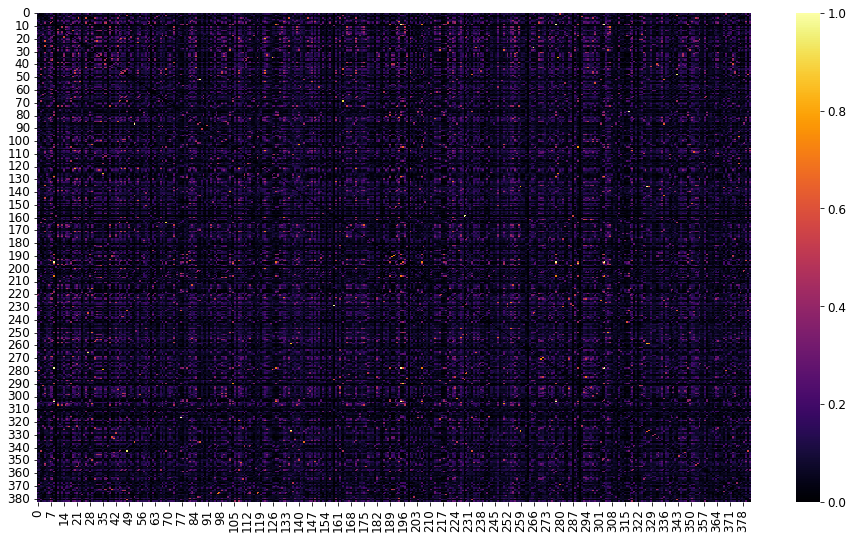

In [456]:
fig, ax =plt.subplots(figsize = (16,9))
sns.heatmap(morgan_sim[:,:], cmap='inferno')

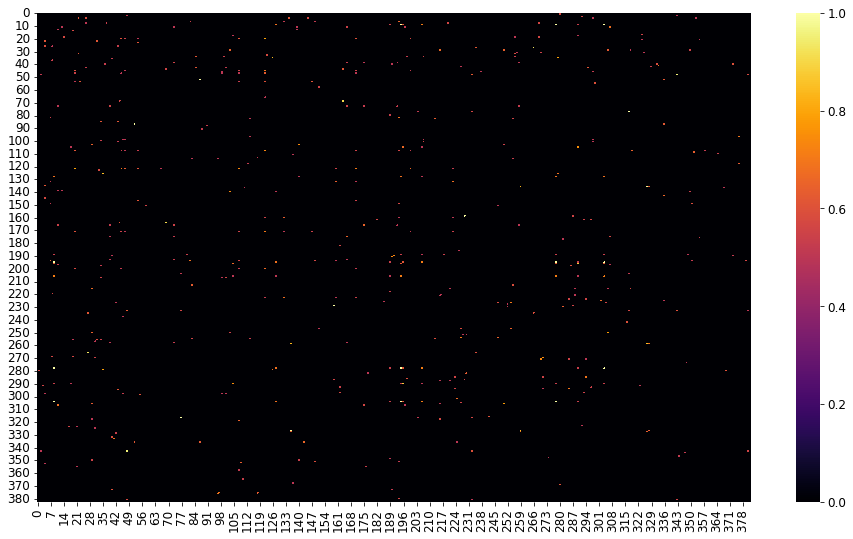

In [275]:
filtered_morgan_sim = np.where(morgan_sim < 0.50, 0, morgan_sim)
fig, ax =plt.subplots(figsize = (16,9))
sns.heatmap(filtered_morgan_sim[:,:], cmap='inferno')

In [276]:
indices = np.nonzero(filtered_morgan_sim)
len(list(set(indices[0].tolist())))

187

In [277]:
indices

(array([  1,   2,   2,   3,   4,   4,   4,   4,   4,   4,   7,   7,   7,
          7,   8,   8,   8,   8,   9,   9,   9,   9,   9,   9,   9,   9,
         11,  11,  11,  11,  11,  11,  13,  13,  14,  17,  18,  18,  19,
         19,  19,  20,  20,  20,  20,  20,  20,  20,  21,  21,  22,  22,
         23,  26,  26,  26,  27,  27,  29,  29,  29,  29,  29,  29,  31,
         31,  31,  32,  32,  33,  34,  34,  34,  34,  34,  35,  35,  36,
         37,  39,  39,  39,  39,  39,  40,  40,  40,  40,  41,  42,  42,
         43,  43,  43,  43,  44,  44,  45,  45,  45,  45,  45,  45,  46,
         46,  46,  47,  47,  47,  47,  47,  47,  48,  48,  48,  48,  52,
         52,  54,  54,  54,  54,  54,  55,  58,  66,  69,  69,  73,  73,
         73,  73,  73,  73,  77,  77,  77,  80,  82,  82,  83,  83,  83,
         85,  85,  87,  87,  88,  91,  97,  97,  99,  99,  99,  99, 100,
        101, 101, 101, 103, 103, 103, 105, 105, 105, 105, 108, 108, 108,
        108, 108, 108, 108, 108, 108, 108, 109, 110

In [278]:
morgan_sim_df = pd.DataFrame(filtered_morgan_sim)
morgan_sim_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,373,374,375,376,377,378,379,380,381,382
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
def find_non_zero_indices(df):
    non_zero_indices = []
    for index, row in df.iterrows():
        row_indices = []
        for col_index, value in row.items():
            if value != 0:
                row_indices.append(col_index)
        if len(row_indices) != 0:
            row_indices.append(index)
            non_zero_indices.append(row_indices)            
    return non_zero_indices

In [280]:
similar_groups = find_non_zero_indices(morgan_sim_df)
for i in range(len(similar_groups)):
    similar_groups[i].sort()
sim_tuples = [tuple(i) for i in similar_groups]
unique_groups = list(set(sim_tuples))
len(unique_groups)


154

In [281]:
unique_groups

[(224, 285, 294),
 (4, 135),
 (3, 292, 323),
 (43, 101, 207, 298),
 (11, 175, 197, 307),
 (2, 48, 343),
 (4, 22, 32),
 (8, 19, 269),
 (20, 45, 47, 54, 108, 122, 171, 194, 200, 319, 358),
 (227, 305),
 (4, 22, 26, 135, 145, 298, 353),
 (189, 218),
 (11, 39, 73, 166, 175, 193, 258),
 (29, 103, 250, 306),
 (7, 132, 160, 171, 223),
 (58, 151),
 (55, 299),
 (23, 54),
 (39, 73, 166, 175, 193, 258),
 (176, 355),
 (108, 358),
 (113, 118, 376),
 (151, 227, 247, 254),
 (143, 336),
 (29, 103, 140, 250),
 (41, 333),
 (18, 105, 196, 206, 290),
 (18, 105, 290),
 (4, 8, 26, 43),
 (110, 365),
 (103, 128, 140, 350),
 (7, 149, 194, 351),
 (292, 323),
 (20, 45, 47, 108, 122, 171, 200),
 (34, 99, 101, 207),
 (111, 137, 368),
 (17, 21, 324),
 (224, 271, 285, 294),
 (48, 233, 343, 381),
 (35, 126, 279),
 (34, 198, 286),
 (1, 280, 369),
 (20, 45, 47, 99, 108, 122, 171),
 (7, 82, 132, 149, 194),
 (29, 140, 350),
 (21, 324, 355),
 (19, 32, 34, 256),
 (27, 235, 266),
 (9, 105, 195, 196, 278, 290, 304),
 (77, 20

In [283]:
all_groups = []
for entry in unique_groups:
    group = []
    for mol in entry:
        group.append(pre_mols[mol])
    all_groups.append(group)

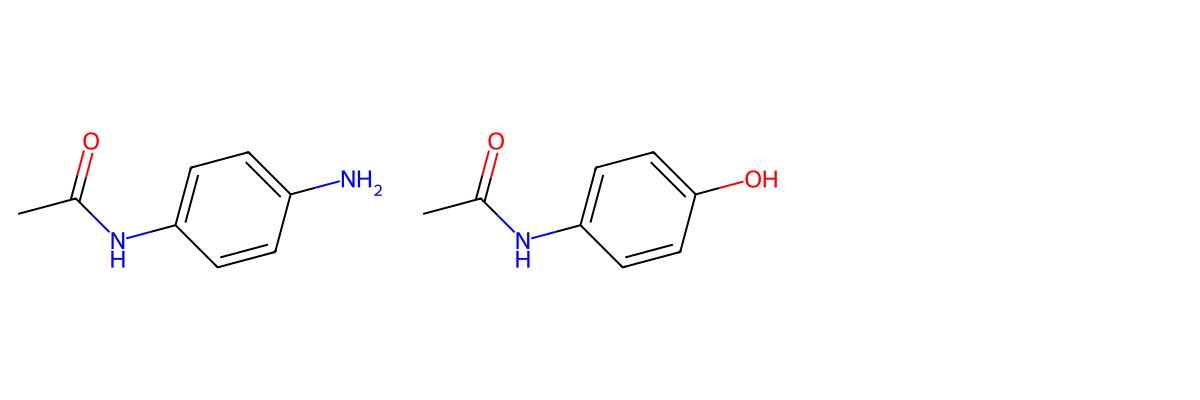

In [287]:
Draw.MolsToGridImage(all_groups[153], subImgSize=(400,400))

In [265]:
unique_groups[15]

(270, 271)

In [197]:
pre_df.iloc[384]

precursor    2,7-naphthalenediol
SMILES        Oc1ccc2ccc(O)cc2c1
Name: 384, dtype: object

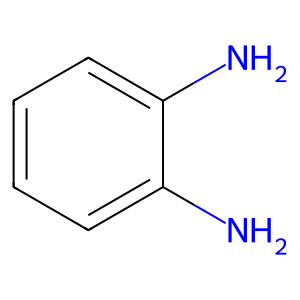

In [152]:
Draw.MolToImage(pre_mols[365])

Note on more duplicates found

ortho phenylenediamine -> 1

4,5-difluorobenzene-1,2-diamine -> 2

3-aminophenylboronic acid -> 1

4-(diethylamino)salicylaldehyde -> 1

N-(3-(trimethoxysilyl)propyl)ethylenediamine ->1

3-aminopropyltriethoxysilane -> 1

2,7-dihydroxynaphthalene -> 1

In [317]:
x_rdkit = rdkit_pre_df.iloc[:,2:].to_numpy()
phys_desc = [i for i in rdkit_pred_df.columns[2:] if not i.startswith('fr_')]
x_rdkit_phys = rdkit_pre_df[phys_desc].to_numpy()
x_rdkit_phys_scaled = StandardScaler().fit_transform(x_rdkit_phys)

In [312]:
tsne = TSNE().fit_transform(x_rdkit)

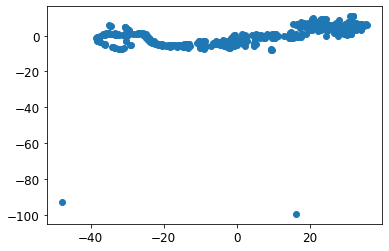

In [313]:
plt.figure()
plt.scatter(tsne[:,0], tsne[:,1])

In [332]:
tsne = TSNE().fit_transform(x_rdkit_phys_scaled)

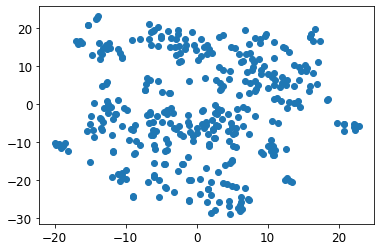

In [333]:
plt.figure()
plt.scatter(tsne[:,0], tsne[:,1])

In [321]:
range_of_ks = range(1,21)
kmeans_per_k = [KMeans(n_clusters = k).fit(x_rdkit_phys_scaled) for k in range_of_ks]
inertias = [model.inertia_ for model in kmeans_per_k]

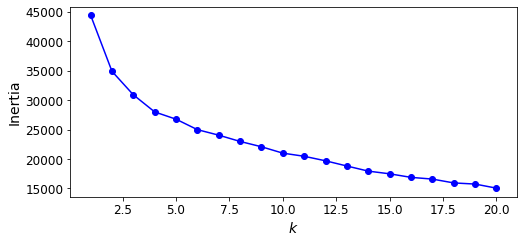

In [322]:
plt.figure(figsize = (8, 3.5))
plt.plot(range(1,21), inertias, 'bo-')
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('Inertia', fontsize = 14)
plt.show()

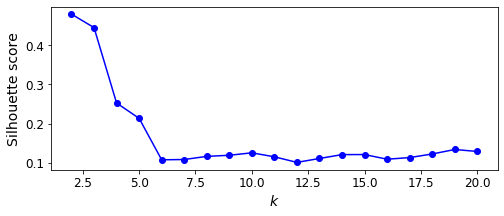

In [325]:
silhouette_scores = [silhouette_score(x_rdkit_phys_scaled, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize = (8, 3))
plt.plot(range(2, 21), silhouette_scores, 'bo-')
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('Silhouette score', fontsize=14)
plt.show()

In [335]:
y_rdkit_phys_clusters = KMeans(n_clusters = 3).fit_predict(x_rdkit_phys_scaled)

In [336]:
tsne = TSNE().fit_transform(x_rdkit_phys_scaled)

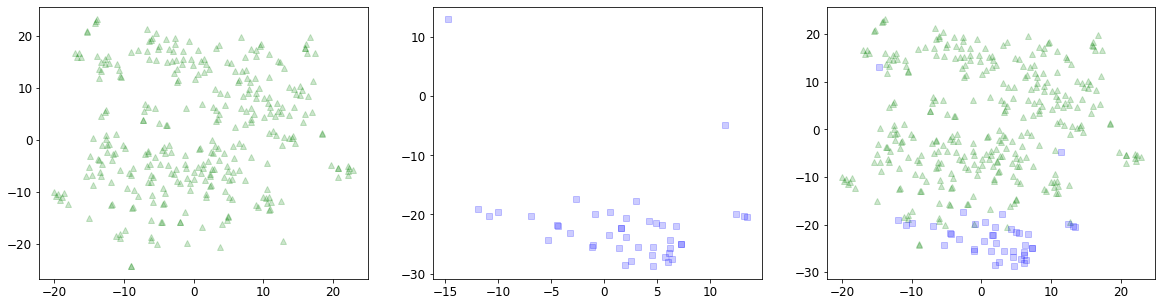

In [334]:
plt.figure(figsize = (20,5))

plt.subplot(131)
plt.plot(tsne[:,0][y_rdkit_phys_clusters == 0], tsne[:,1][y_rdkit_phys_clusters == 0], 'g^', alpha = 0.2)
# plt.axis([-100, 100, -100, 100])

plt.subplot(132)
plt.plot(tsne[:,0][y_rdkit_phys_clusters == 1], tsne[:,1][y_rdkit_phys_clusters == 1], 'bs', alpha = 0.2)
# plt.axis([-100, 100, -100, 100])

plt.subplot(133)
plt.plot(tsne[:,0][y_rdkit_phys_clusters == 0], tsne[:,1][y_rdkit_phys_clusters == 0], 'g^', alpha = 0.2)
plt.plot(tsne[:,0][y_rdkit_phys_clusters == 1], tsne[:,1][y_rdkit_phys_clusters == 1], 'bs', alpha = 0.2)
# plt.axis([-100, 100, -100, 100])

plt.show()

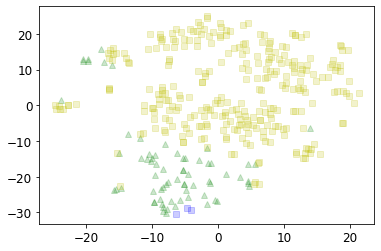

In [338]:
plt.figure()
plt.plot(tsne[:,0][y_rdkit_phys_clusters == 0], tsne[:,1][y_rdkit_phys_clusters == 0], 'g^', alpha = 0.2)
plt.plot(tsne[:,0][y_rdkit_phys_clusters == 1], tsne[:,1][y_rdkit_phys_clusters == 1], 'bs', alpha = 0.2)
plt.plot(tsne[:,0][y_rdkit_phys_clusters == 2], tsne[:,1][y_rdkit_phys_clusters == 2], 'ys', alpha = 0.2)

In [326]:
range_of_ks = range(1,21)
kmeans_per_k = [KMeans(n_clusters = k).fit(morgan_pre) for k in range_of_ks]
inertias = [model.inertia_ for model in kmeans_per_k]

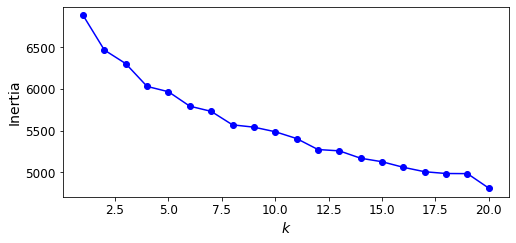

In [327]:
plt.figure(figsize = (8, 3.5))
plt.plot(range(1,21), inertias, 'bo-')
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('Inertia', fontsize = 14)
plt.show()

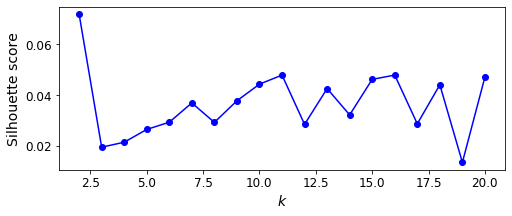

In [328]:
silhouette_scores = [silhouette_score(morgan_pre, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize = (8, 3))
plt.plot(range(2, 21), silhouette_scores, 'bo-')
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('Silhouette score', fontsize=14)
plt.show()

## tSNE and clustering of morgan fingerprints

In [340]:
tsne_morgan = TSNE().fit_transform(morgan_pre)

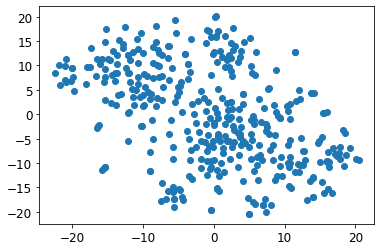

In [341]:
plt.figure()
plt.scatter(tsne_morgan[:,0], tsne_morgan[:,1])

In [342]:
range_of_ks = range(1,21)
kmeans_per_k = [KMeans(n_clusters = k).fit(tsne_morgan) for k in range_of_ks]
inertias = [model.inertia_ for model in kmeans_per_k]

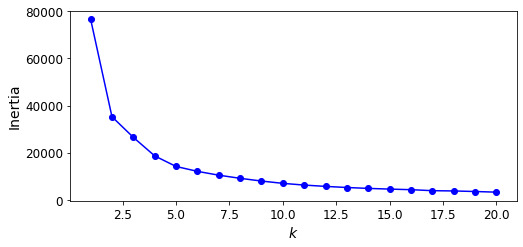

In [343]:
plt.figure(figsize = (8, 3.5))
plt.plot(range(1,21), inertias, 'bo-')
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('Inertia', fontsize = 14)
plt.show()

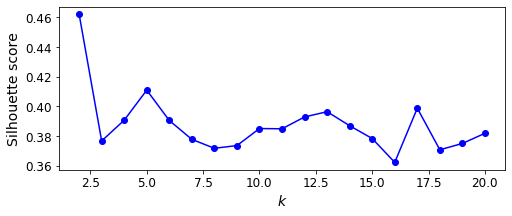

In [344]:
silhouette_scores = [silhouette_score(tsne_morgan, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize = (8, 3))
plt.plot(range(2, 21), silhouette_scores, 'bo-')
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('Silhouette score', fontsize=14)
plt.show()

In [388]:
y_morgan_clusters = KMeans(n_clusters = 2).fit_predict(tsne_morgan)

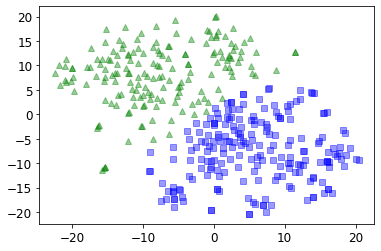

In [389]:
plt.figure()
plt.plot(tsne_morgan[:,0][y_morgan_clusters == 0], tsne_morgan[:,1][y_morgan_clusters == 0], 'g^', alpha = 0.4)
plt.plot(tsne_morgan[:,0][y_morgan_clusters == 1], tsne_morgan[:,1][y_morgan_clusters == 1], 'bs', alpha = 0.4)
# plt.plot(tsne_morgan[:,0][y_morgan_clusters == 2], tsne_morgan[:,1][y_morgan_clusters == 2], 'ys', alpha = 0.4)
# plt.plot(tsne_morgan[:,0][y_morgan_clusters == 3], tsne_morgan[:,1][y_morgan_clusters == 3], 'ks', alpha = 0.4)
# plt.plot(tsne_morgan[:,0][y_morgan_clusters == 4], tsne_morgan[:,1][y_morgan_clusters == 4], 'rs', alpha = 0.4)

In [390]:
y_0 = np.where(y_morgan_clusters == 0)
y_1 = np.where(y_morgan_clusters == 1)
# y_2 = np.where(y_morgan_clusters == 2)
# y_3 = np.where(y_morgan_clusters == 3)
# y_4 = np.where(y_morgan_clusters == 4)

In [391]:
y_0_sample = random.sample(y_0[0].tolist(), 15)
y_1_sample = random.sample(y_1[0].tolist(), 15)
# y_2_sample = random.sample(y_2[0].tolist(), 15)
# y_3_sample = random.sample(y_3[0].tolist(), 15)
# y_4_sample = random.sample(y_4[0].tolist(), 15)

In [375]:
def molecule_groups(group, molecules):
    mgroup = []
    for value in group:
        mgroup.append(molecules[value])
    return mgroup

In [392]:
y_0_sample_group = molecule_groups(y_0_sample, pre_mols)
y_1_sample_group = molecule_groups(y_1_sample, pre_mols)
# y_2_sample_group = molecule_groups(y_2_sample, pre_mols)
# y_3_sample_group = molecule_groups(y_3_sample, pre_mols)
# y_4_sample_group = molecule_groups(y_4_sample, pre_mols)

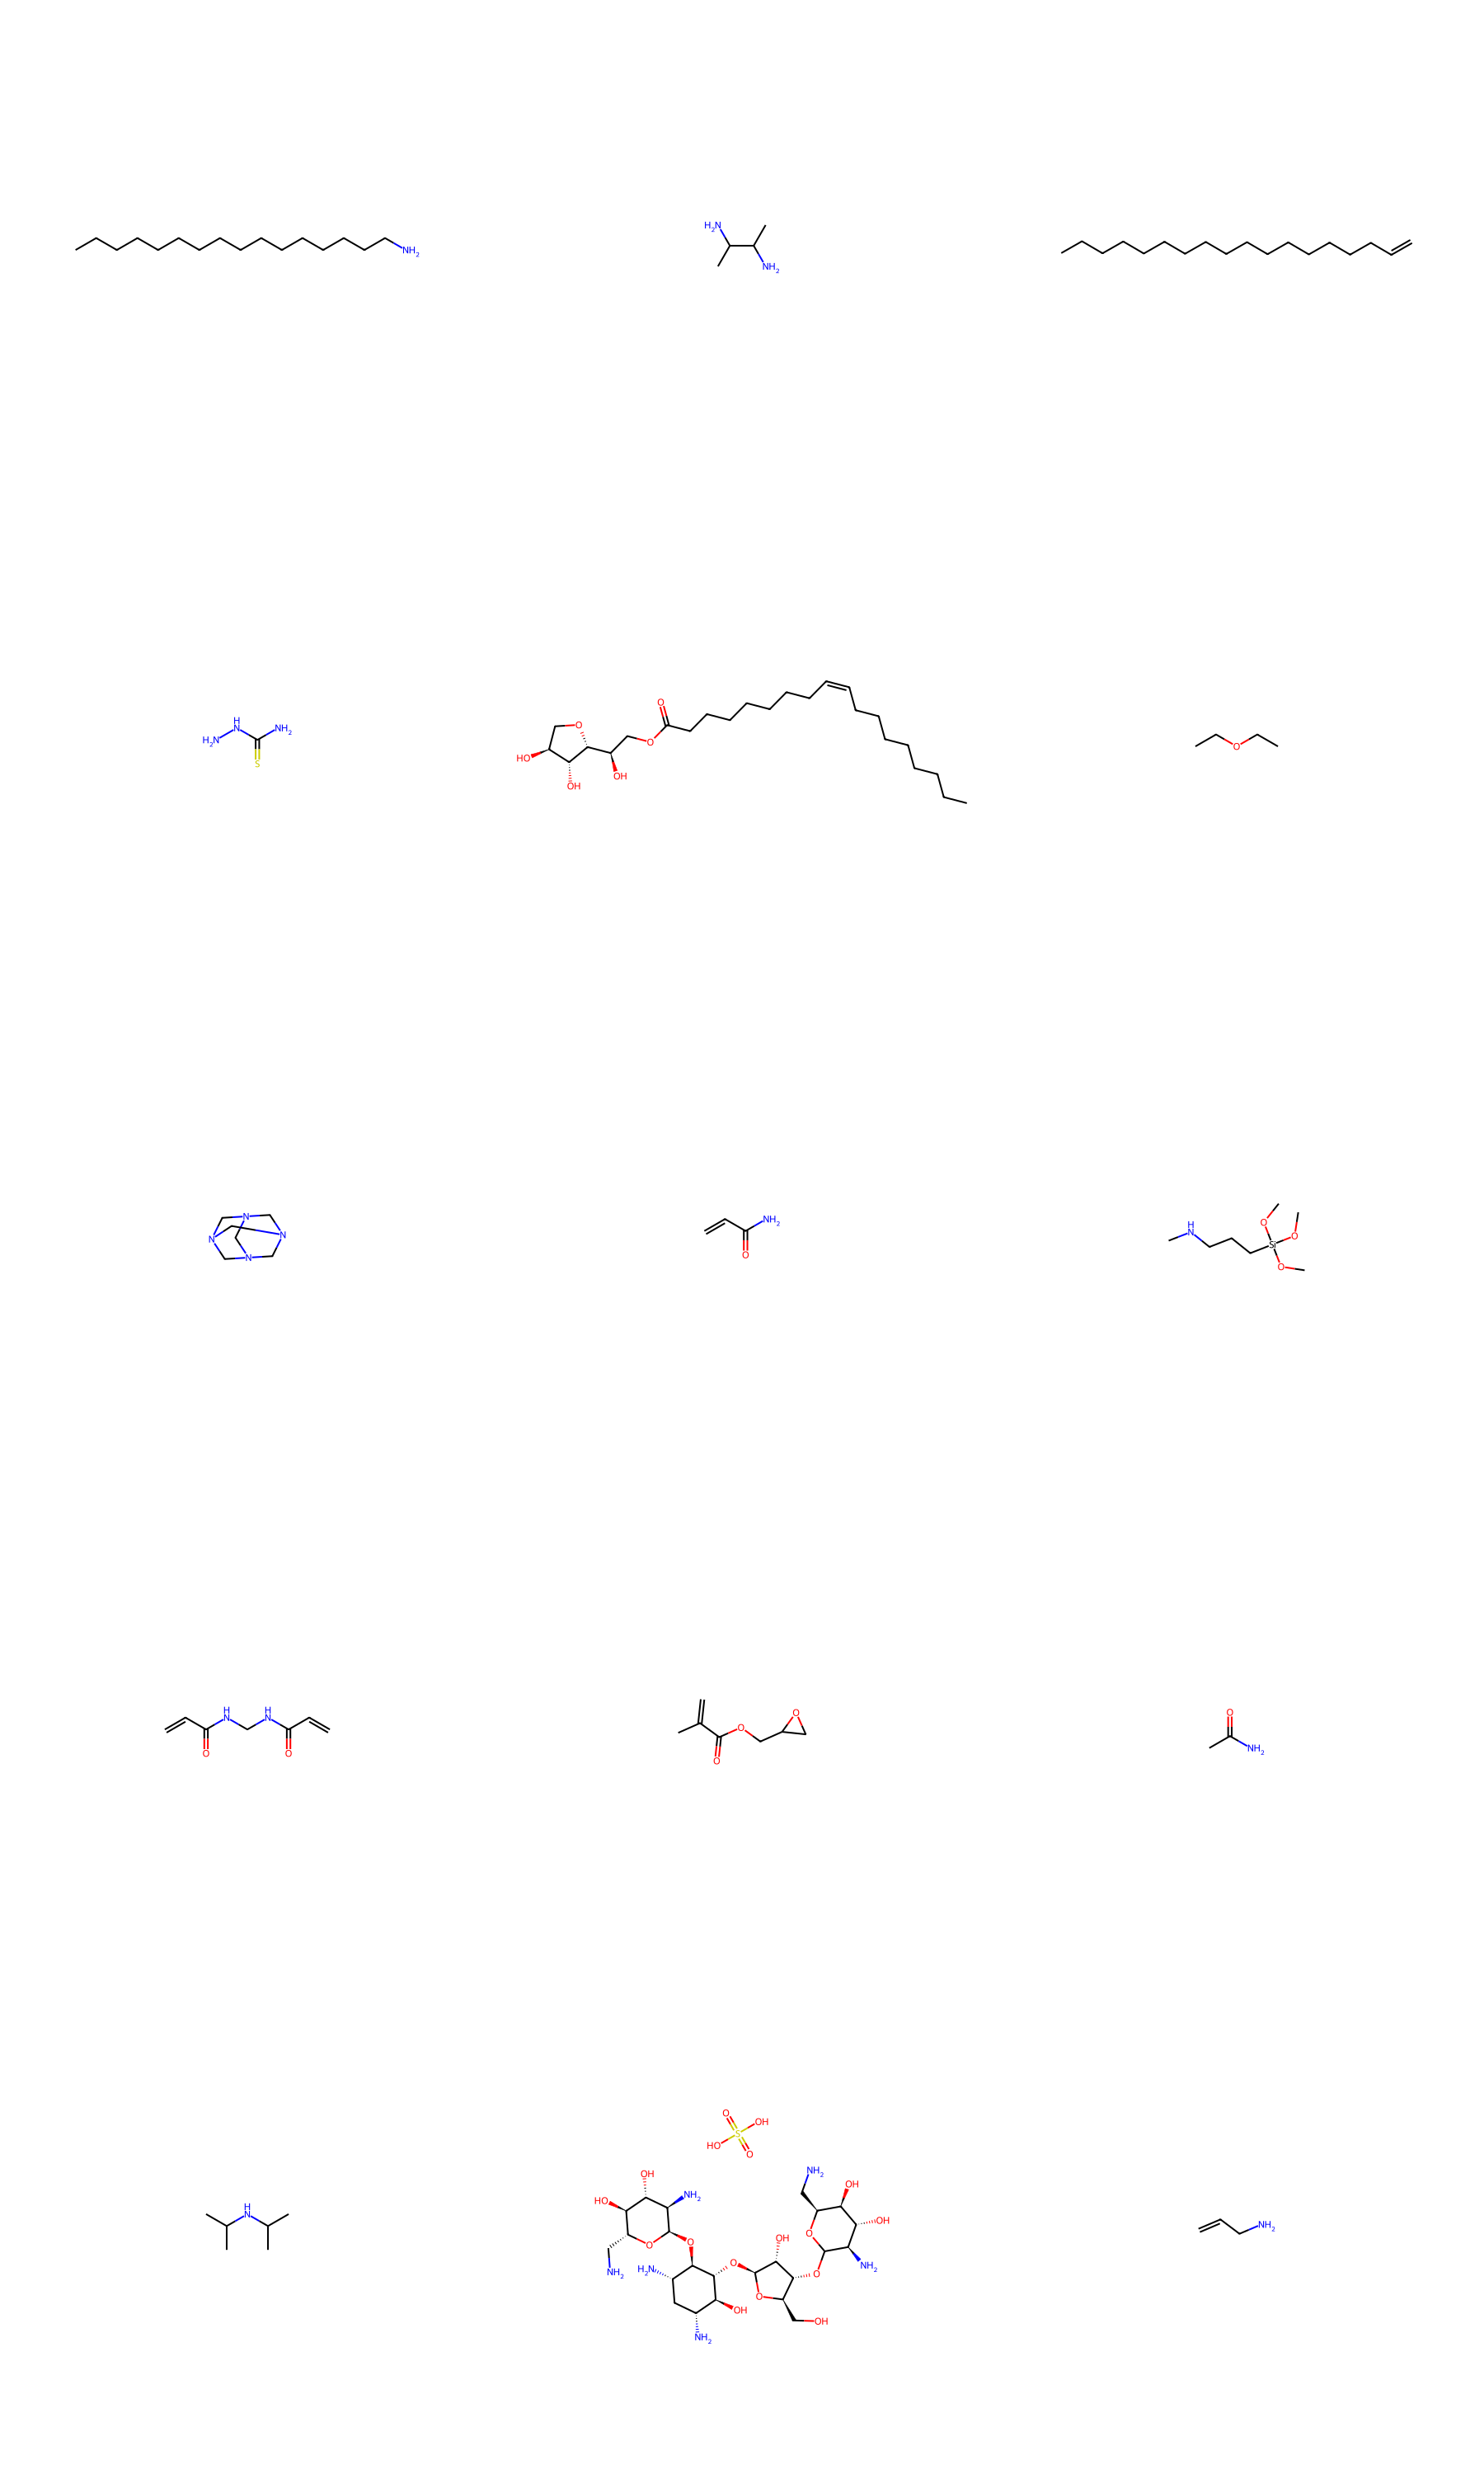

In [522]:
Draw.MolsToGridImage(y_1_sample_group, subImgSize=(600,600))

## tSNE and clustering of rdkit fingerprints

In [398]:
x_rdkit = rdkit_pre_df.iloc[:,2:].to_numpy()
phys_desc = [i for i in rdkit_pred_df.columns[2:] if not i.startswith('fr_')]
x_rdkit_phys = rdkit_pre_df[phys_desc].to_numpy()
x_rdkit_phys_scaled = StandardScaler().fit_transform(x_rdkit_phys)
tsne_rdkit = TSNE().fit_transform(x_rdkit_phys_scaled)

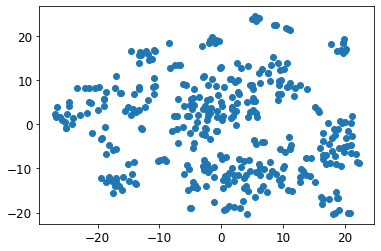

In [399]:
plt.figure()
plt.scatter(tsne_rdkit[:,0], tsne_rdkit[:,1])

In [404]:
range_of_ks = range(1,41)
kmeans_per_k = [KMeans(n_clusters = k).fit(tsne_rdkit) for k in range_of_ks]
inertias = [model.inertia_ for model in kmeans_per_k]

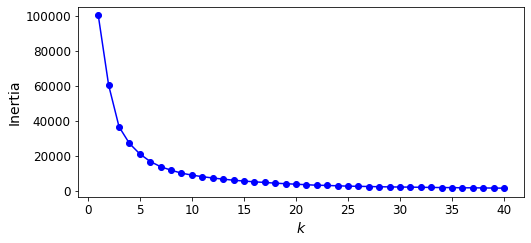

In [406]:
plt.figure(figsize = (8, 3.5))
plt.plot(range(1,41), inertias, 'bo-')
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('Inertia', fontsize = 14)
plt.show()

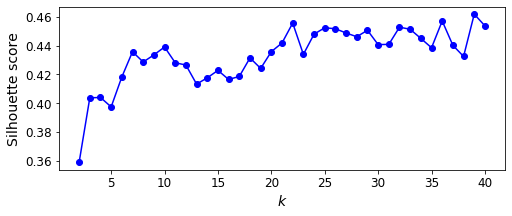

In [407]:
silhouette_scores = [silhouette_score(tsne_rdkit, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize = (8, 3))
plt.plot(range(2, 41), silhouette_scores, 'bo-')
plt.xlabel('$k$', fontsize = 14)
plt.ylabel('Silhouette score', fontsize=14)
plt.show()

## Similarity to top 20

In [442]:
top_20 = ['citric acid',
 'ethylenediamine',
 'urea',
 'glucose',
 'o-phenylenediamine',
 'p-phenylenediamine',
 'thiourea',
 'cysteine',
 'ascorbic acid',
 'ammonium citrate',
 'acetic acid',
 'm-phenylenediamine',
 'folic acid',
 'EDTA',
 '1,3,6-trinitropyrene',
 'sucrose',
 'pyrene']

In [444]:
top_20_df = pre_df[pre_df['precursor'].isin(top_20)]
top_20_df

,precursor,SMILES
0,citric acid,OC(=O)CC(O)(CC(O)=O)C(O)=O
3,thiourea,NC(N)=S
4,p-phenylenediamine,Nc1ccc(N)cc1
5,ascorbic acid,OCC(O)C1OC(=C(O)C1=O)O
8,o-phenylenediamine,Nc1ccccc1N
17,urea,NC(N)=O
18,ethylenediamine,NCCN
21,acetic acid,CC(O)=O
27,EDTA,OC(=O)CN(CCN(CC(O)=O)CC(O)=O)CC(O)=O
30,ammonium citrate,[NH4+].[NH4+].[NH4+].OC(CC([O-])=O)(CC([O-])=O...


In [458]:
top_20_mols = []
for entry in top_20_df['SMILES'].to_list():
    top_20_mols.append(Chem.MolFromSmiles(str(entry)))
len(top_20_mols)

17

In [459]:
top_20_fps = [AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in top_20_mols]

In [465]:
all_sims = []
for i in range(len(top_20_fps)):
    all_sims.append(DataStructs.BulkTanimotoSimilarity(top_20_fps[i], pre_fps[:]))

In [471]:
for i in range(len(all_sims)):
    all_sims[i] = np.asarray(all_sims[i])

In [481]:
sims_filtered = []
for i in range(len(all_sims)):
    sims_filtered.append(list(np.where(all_sims[i]>0.5)[0]))

In [482]:
sims_filtered

[[0],
 [3, 292],
 [4, 22, 26, 135, 145],
 [5],
 [8, 37, 220, 269],
 [17, 324],
 [18],
 [21],
 [27, 235, 266],
 [30],
 [35, 126, 279],
 [39, 73, 166],
 [36, 40, 332, 373],
 [41, 333],
 [26, 43, 85, 101, 295],
 [88, 91],
 [170]]

In [484]:
sim_groups = []
for i in range(len(sims_filtered)):
    sim_groups.append(molecule_groups(sims_filtered[i], pre_mols))

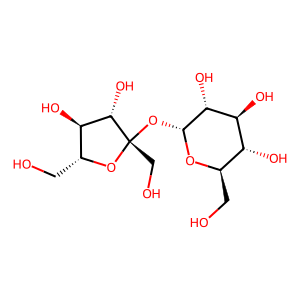

In [519]:
Draw.MolToImage(top_20_mols[16])

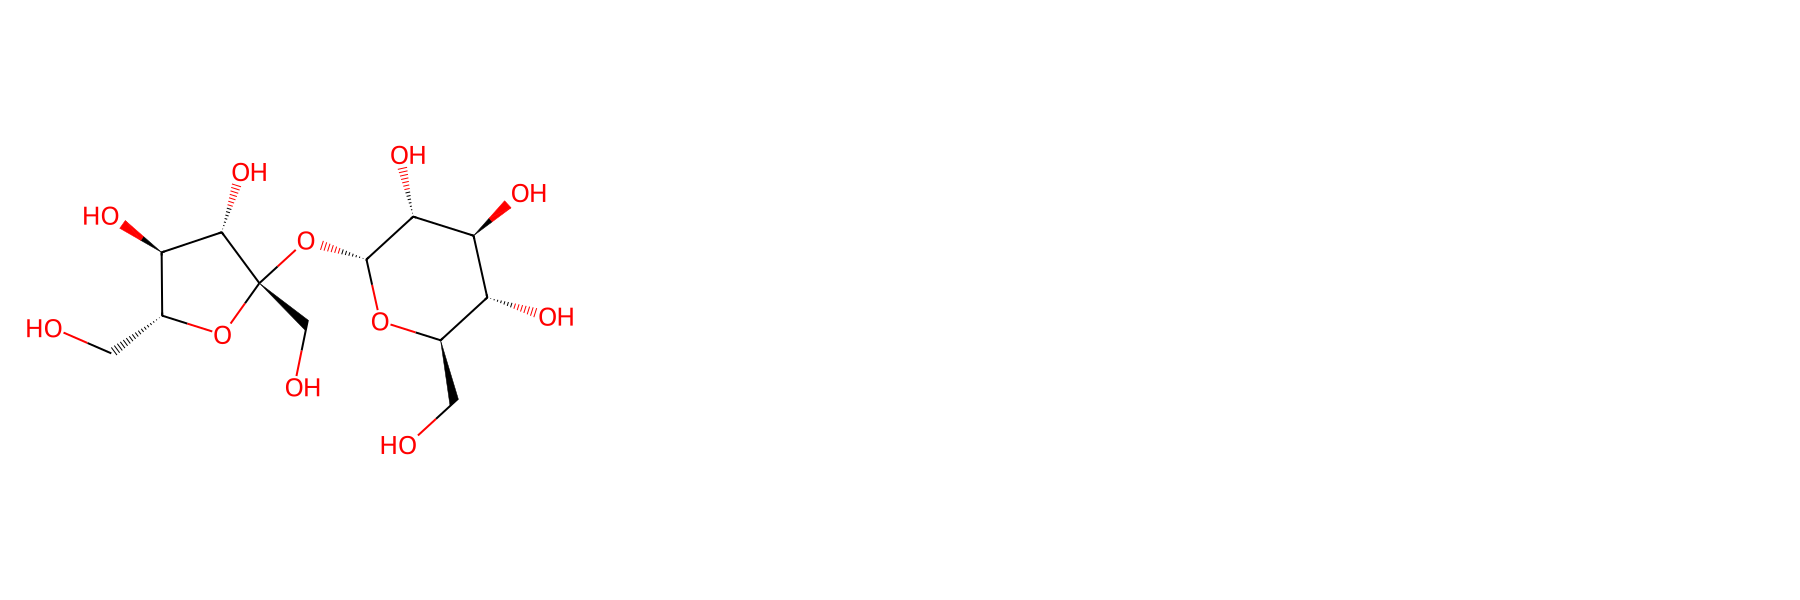

In [520]:
Draw.MolsToGridImage(sim_groups[16], subImgSize=(600,600))

## QM9 dataset

In [12]:
#importing QM9 dataset
# path = '/Users/pnt17/Library/CloudStorage/OneDrive-ImperialCollegeLondon'
path = r'C:\Users\Piotr\OneDrive - Imperial College London'
file_name = 'qm9.csv'
qm9_df = pd.read_csv(os.path.join(path,file_name))
qm9_df.head(10)

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_1,C,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,...,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772
1,gdb_2,N,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,O,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171
3,gdb_4,C#C,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,...,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724
4,gdb_5,C#N,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,...,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028
5,gdb_6,C=O,285.48839,38.982300,34.298920,2.1089,14.18,-0.2670,-0.0406,0.2263,...,0.026603,-114.483613,-114.480746,-114.479802,-114.505268,6.413,-358.756935,-360.512706,-362.291066,-340.464421
6,gdb_7,CC,80.46225,19.906490,19.906330,0.0000,23.95,-0.3385,0.1041,0.4426,...,0.074542,-79.764152,-79.760666,-79.759722,-79.787269,10.098,-670.788296,-675.710476,-679.860821,-626.927299
7,gdb_8,CO,127.83497,24.858720,23.978720,1.5258,16.97,-0.2653,0.0784,0.3437,...,0.051208,-115.679136,-115.675816,-115.674872,-115.701876,8.751,-481.106758,-484.355372,-487.319724,-450.124128
8,gdb_9,CC#C,160.28041,8.593230,8.593210,0.7156,28.78,-0.2609,0.0613,0.3222,...,0.055410,-116.609549,-116.605550,-116.604606,-116.633775,12.482,-670.268091,-673.980434,-677.537155,-631.346845
9,gdb_10,CC#N,159.03567,9.223270,9.223240,3.8266,24.45,-0.3264,0.0376,0.3640,...,0.045286,-132.718150,-132.714563,-132.713619,-132.742149,10.287,-589.812024,-592.893721,-595.857446,-557.125708


In [13]:
#converting smiles to rdkit molecules
qm9_mols = []
for entry in qm9_df['smiles'].to_list():
    qm9_mols.append(Chem.MolFromSmiles(str(entry)))

In [14]:
len(qm9_mols)

133885

In [15]:
#generating morgan fingerprints
qm9_fps = [AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in qm9_mols]

In [16]:
#Converting the fingerprints to numpy arrays
np_qm9_fps =[]
for fp in qm9_fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp,arr)
    np_qm9_fps.append(arr)
len(np_qm9_fps[0])

2048

In [17]:
# qm9_fps_df = pd.DataFrame(columns = [i for i in range(2048)])
# for fp in tqdm.tqdm(np_qm9_fps):
#     qm9_fps_df.loc[len(qm9_fps_df)] = fp
# qm9_fps_df.head(10)

In [18]:
morgan_qm9 = np.vstack(np_qm9_fps)

In [19]:
morgan_qm9.shape

(133885, 2048)

In [22]:
all_morgan = np.vstack((morgan_pre, morgan_qm9))

In [21]:
morgan_pre.shape

(396, 2048)

In [23]:
all_morgan.shape

(134281, 2048)

In [26]:
n = 134281  # Change this to the desired number of dimensions
num_samples = n

# Create an n-dimensional array of zeros
shape = (num_samples,) 
array = np.zeros((n,1))

# Set the first 396 samples to 1
num_samples_to_set = 396
array_flat = array.reshape(-1)
array_flat[:num_samples_to_set] = 1
labels = array_flat.reshape(shape)
labels.shape

(134281,)

In [27]:
print(labels)

[1. 1. 1. ... 0. 0. 0.]


In [ ]:
# tsne = TSNE().fit_transform(all_morgan)

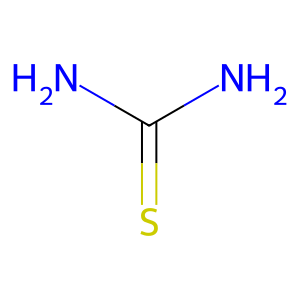

In [81]:
img = Draw.MolToImage(pre_mols[3])
img


In [40]:
pre_fps_df = pd.DataFrame(columns = [i for i in range(2048)])
for fp in np_pre_fps:
    pre_fps_df.loc[len(pre_fps_df)] = fp
pre_fps_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
array_list = [np.random.rand(2048) for _ in range(10)]  # Example: Creating 10 arrays

# Create an empty DataFrame with 2048 columns
num_columns = 2048
columns = [f'Column_{i+1}' for i in range(num_columns)]
df = pd.DataFrame(columns=columns)

# Iterate through the array_list and append each array as a row
for array in array_list:
    df.loc[len(df)] = array

# Print the resulting DataFrame
print(df)


   Column_1  Column_2  Column_3  Column_4  Column_5  Column_6  Column_7  \
0  0.524483  0.905950  0.839753  0.335019  0.964530  0.630504  0.149986   
1  0.649761  0.117817  0.758094  0.698529  0.104783  0.542570  0.567222   
2  0.363870  0.921699  0.848911  0.373286  0.154433  0.790063  0.399255   
3  0.577577  0.026223  0.236106  0.919432  0.688613  0.059870  0.289369   
4  0.200281  0.343779  0.225435  0.766870  0.243332  0.248648  0.961152   
5  0.143708  0.169605  0.329406  0.053847  0.336316  0.657359  0.329856   
6  0.967899  0.380544  0.073767  0.343391  0.615500  0.326246  0.575223   
7  0.408821  0.470164  0.968122  0.478957  0.374495  0.422242  0.853457   
8  0.658493  0.423334  0.116760  0.288871  0.933178  0.819721  0.547124   
9  0.370634  0.375268  0.728710  0.288105  0.351752  0.330656  0.747977   

   Column_8  Column_9  Column_10  ...  Column_2039  Column_2040  Column_2041  \
0  0.229518  0.157230   0.537729  ...     0.953561     0.232848     0.219485   
1  0.592694  0